<a href="https://www.kaggle.com/code/aminizahra/design-neural-network-model-in-keras?scriptVersionId=97548799" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="color:#D81F26;
           display:fill;
           border-radius:200px;
           border-style: solid;
           border-width: 6px;
           border-color:#000000;
           background-color:#f5f5f5;
           font-size:30px;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 15px;
           color:#D81F26;">
Design Neural Network model in Keras
</h1>
</div>

<br>
<br>
<br>
<a href="https://imgbb.com/" class="center"><img src="https://i.ibb.co/TT8Wrm7/Keras.png" alt="Keras" border="0"></a>
<br>
<br>
<br>

**Note: It is an educational notebook just to do my homework for the Filoger Neural Network course that teaching by Amin Alipour.**

<a href="https://ibb.co/yQ290CT"><img src="https://i.ibb.co/XCHQXPB/NN-08.jpg" alt="NN-08" border="0"></a>

# <p style="border-radius:15px;border-style:solid;border-color:#838996;border-width:3px;background-color:#f2f3f4;padding: 20px;font-family:Verdana;color:#D81F26;font-size:30px;text-align: center;">Import Libraries</p>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
import keras

from keras.models import Sequential
from keras.layers import Dense

from keras.utils.vis_utils import plot_model

# <p style="border-radius:15px;border-style:solid;border-color:#838996;border-width:3px;background-color:#f2f3f4;padding: 20px;font-family:Verdana;color:#D81F26;font-size:30px;text-align: center;">Read Datasets</p>

In [3]:
concrete_data = pd.read_csv('../input/concrete-data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


<p style = "font-size : 15px; color : #D81F26 ; font-family : 'fantasy'; "><b>Split data into predictors and target</b></p>

In [4]:
#concrete_data_columns = concrete_data.columns
predictors = concrete_data[['Cement', 'Superplasticizer', 'Age']]
target = concrete_data['Strength'] # Strength column

In [5]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Superplasticizer,Age
0,2.476712,-0.620147,-0.279597
1,2.476712,-0.620147,-0.279597
2,0.491187,-1.038638,3.551340
3,0.491187,-1.038638,5.055221
4,-0.790075,-1.038638,4.976069


<AxesSubplot:>

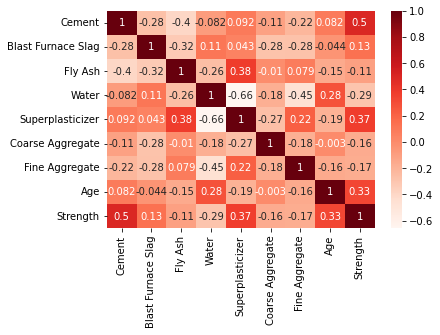

In [6]:
sns.heatmap(concrete_data.corr(), annot=True,cmap='Reds')

In [7]:
n_cols = predictors_norm.shape[1] # number of predictors
n_cols

3

# <p style="border-radius:15px;border-style:solid;border-color:#838996;border-width:3px;background-color:#f2f3f4;padding: 20px;font-family:Verdana;color:#D81F26;font-size:30px;text-align: center;">Build a Neural Network</p>

<p style = "font-size : 15px; color : #D81F26 ; font-family : 'fantasy'; "><b>
--> 3 > MLP (4) > MLP (4)> MLP (4) > MPL(1)
<br>
--> 3 > MLP (4, relu) > MLP (4, relu)> MLP (4, relu) > MLP(1)
<br>
--> 3 > Dense(4, relu) > Dense(4, relu)> Dense(4, relu) > Dense(1)
<br>
--> validation_split=0.25,Active_Function=RelU, optimizer =SGD, loss function=MSE, Metrics=accuracy, epochs=83</b></p>


In [8]:
# define regression model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(4, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(1, activation='relu'))
    
    # compile model
    model.compile(optimizer='SGD', loss='mean_squared_error', metrics=['accuracy'])
    return model

In [9]:
model = create_model()

2022-06-05 15:35:42.368292: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


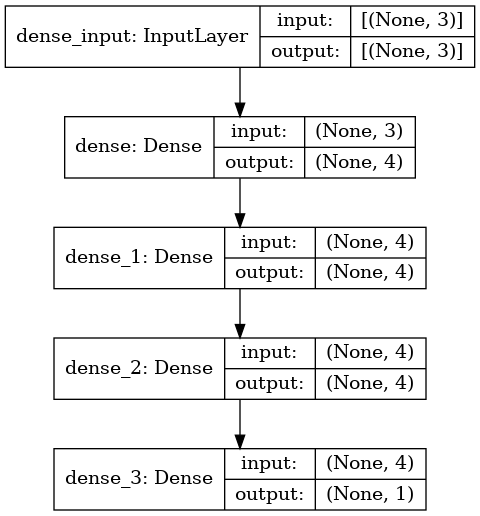

In [10]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [11]:
history = model.fit(predictors_norm, target, validation_split=0.25, epochs=83, verbose=2)

2022-06-05 15:35:43.777011: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/83
25/25 - 1s - loss: 1391.0135 - accuracy: 0.0000e+00 - val_loss: 543.9866 - val_accuracy: 0.0000e+00
Epoch 2/83
25/25 - 0s - loss: 684.2121 - accuracy: 0.0000e+00 - val_loss: 266.7874 - val_accuracy: 0.0000e+00
Epoch 3/83
25/25 - 0s - loss: 450.3546 - accuracy: 0.0000e+00 - val_loss: 180.5083 - val_accuracy: 0.0000e+00
Epoch 4/83
25/25 - 0s - loss: 362.2634 - accuracy: 0.0000e+00 - val_loss: 162.3694 - val_accuracy: 0.0000e+00
Epoch 5/83
25/25 - 0s - loss: 330.4599 - accuracy: 0.0000e+00 - val_loss: 162.5493 - val_accuracy: 0.0000e+00
Epoch 6/83
25/25 - 0s - loss: 320.8238 - accuracy: 0.0000e+00 - val_loss: 167.3560 - val_accuracy: 0.0000e+00
Epoch 7/83
25/25 - 0s - loss: 315.9302 - accuracy: 0.0000e+00 - val_loss: 170.1944 - val_accuracy: 0.0000e+00
Epoch 8/83
25/25 - 0s - loss: 314.6645 - accuracy: 0.0000e+00 - val_loss: 175.1020 - val_accuracy: 0.0000e+00
Epoch 9/83
25/25 - 0s - loss: 313.8184 - accuracy: 0.0000e+00 - val_loss: 177.9998 - val_accuracy: 0.0000e+00
Epoch 10/

In [12]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

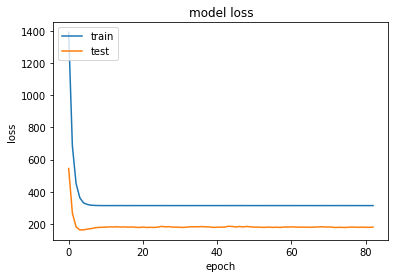

In [13]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
def pred(features):
    featurs_norm = (features - features.mean()) / features.std()
    prediction = model.predict(featurs_norm)
    return prediction


In [15]:
sample_to_predict = np.array([[540.0, 2.5, 28]]) # 79.99
predicted = pred(sample_to_predict)
print(predicted)

[[36.89012]]


# <p style="padding: 20px;font-family:Verdana;color:#D81F26;font-size:30px;text-align: center;">Finished!</p>